In [59]:
from datetime import datetime
import rasterio
import numpy as np
import pandas as pd
import os
from loguru import logger
from glob import glob

from matplotlib import pyplot as plt

In [5]:
fp_hls = "hls-landsat/HLS.L30.T15RXQ.2023139T163726.v2.0.B02.tif"
fp_opera = "opera/OPERA_L3_DSWx-HLS_T15RXQ_20230418T163113Z_20230427T165848Z_L8_30_v1.0_B01_WTR.tif"

In [40]:
# Find all relevant opera tiles
ctr = 0
opera_files_with_match = []
opera_hls_mapping = {}
for fp_opera in os.listdir("opera"):
    if not fp_opera.endswith("WTR.tif"):
        continue
    opera_sat = fp_opera.split("_")[-5]
    opera_tile_id = fp_opera.split("_")[-8]
    opera_datetime = fp_opera.split("_")[-7]
    opera_year = opera_datetime[:4]
    opera_date = opera_datetime.split("T")[0]
    datetime_object = datetime.strptime(opera_date, '%Y%m%d')
    opera_day_of_year = datetime_object.timetuple().tm_yday

    hls_date = f"{opera_year}{opera_day_of_year}"
    
    if opera_sat == "L8": # landsat
        sat_dir = "hls-landsat"
    else:
        sat_dir = "hls-sentinel"
    sat_files = glob(os.path.join(sat_dir, f"*.{opera_tile_id}.{hls_date}*"))
    if len(sat_files)>0:
        opera_hls_mapping[fp_opera] = sat_files
        opera_files_with_match.append(fp_opera)
        ctr += 1
        logger.debug(f"[{len(sat_files)}]. opera_sat: {opera_sat}, opera_tile_id: {opera_tile_id}, opera_year: {opera_year}, opera_day_of_year: {opera_day_of_year}. hls_date: {hls_date}")
        # break
logger.debug(f"Found {ctr} matched opera files")

2024-02-01 00:23:14.592 | DEBUG    | __main__:<module>:27 - [18]. opera_sat: S2A, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 110. hls_date: 2023110
2024-02-01 00:23:14.601 | DEBUG    | __main__:<module>:27 - [18]. opera_sat: S2A, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 110. hls_date: 2023110
2024-02-01 00:23:14.607 | DEBUG    | __main__:<module>:27 - [15]. opera_sat: L8, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 115. hls_date: 2023115
2024-02-01 00:23:14.613 | DEBUG    | __main__:<module>:27 - [15]. opera_sat: L8, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 115. hls_date: 2023115


2024-02-01 00:23:14.621 | DEBUG    | __main__:<module>:27 - [18]. opera_sat: S2B, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 115. hls_date: 2023115
2024-02-01 00:23:14.630 | DEBUG    | __main__:<module>:27 - [18]. opera_sat: S2B, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 115. hls_date: 2023115
2024-02-01 00:23:14.652 | DEBUG    | __main__:<module>:27 - [18]. opera_sat: S2A, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 120. hls_date: 2023120
2024-02-01 00:23:14.659 | DEBUG    | __main__:<module>:27 - [18]. opera_sat: S2A, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 120. hls_date: 2023120
2024-02-01 00:23:14.690 | DEBUG    | __main__:<module>:27 - [18]. opera_sat: S2B, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 125. hls_date: 2023125
2024-02-01 00:23:14.698 | DEBUG    | __main__:<module>:27 - [18]. opera_sat: S2B, opera_tile_id: T15RWQ, opera_year: 2023, opera_day_of_year: 125. hls_date: 2023125
2024-02-01

In [37]:
print(len(opera_files_with_match))
ctr = 0
for fp in opera_files_with_match:
    dataset = rasterio.open(os.path.join("opera", fp))
    data = dataset.read(1)
    data_vals = np.unique(data)
    if 1 in data_vals:
        ctr += 1
        logger.debug(f"vals: {data_vals}")
logger.debug(f"Found {ctr} tiles with water pixels")

190


2024-01-31 23:54:05.794 | DEBUG    | __main__:<module>:9 - vals: [  0   1   2 252 253 255]
2024-01-31 23:54:06.088 | DEBUG    | __main__:<module>:9 - vals: [  0   1 252 253 255]
2024-01-31 23:54:06.383 | DEBUG    | __main__:<module>:9 - vals: [  0   1   2 252 253 255]
2024-01-31 23:54:06.682 | DEBUG    | __main__:<module>:9 - vals: [  0   1 252 253 255]
2024-01-31 23:54:06.973 | DEBUG    | __main__:<module>:9 - vals: [  0   1   2 252 253 255]
2024-01-31 23:54:07.280 | DEBUG    | __main__:<module>:9 - vals: [  0   1 252 253 255]
2024-01-31 23:54:07.595 | DEBUG    | __main__:<module>:9 - vals: [  0   1   2 252 253 255]
2024-01-31 23:54:07.894 | DEBUG    | __main__:<module>:9 - vals: [  0   1 252 253 255]
2024-01-31 23:54:09.355 | DEBUG    | __main__:<module>:9 - vals: [  0   1   2 252 253 255]
2024-01-31 23:54:09.658 | DEBUG    | __main__:<module>:9 - vals: [  0   1 252 253 255]
2024-01-31 23:54:09.972 | DEBUG    | __main__:<module>:9 - vals: [  0   1   2 252 253 255]
2024-01-31 23:54:10

In [82]:

output_chunks = []
input_chunks = []
satellite_types = []
for opera_fn, hls_fps in opera_hls_mapping.items():
    output_dataset = rasterio.open(os.path.join("opera", opera_fn))
    output_data = output_dataset.read()

    samp_fp = hls_fps[0]
    if "landsat" in samp_fp:
        sat_type = "L"
        bands = ["B02", "B03", "B04", "B05", "B06", "B07"]  # landsat
    else:
        sat_type = "S"
        bands = ["B02", "B03", "B04", "B8A", "B11", "B12"]  # sentinel
    # print(samp_fp)
    prefix = ".".join(samp_fp.split(".")[:-2])
    input_bands = []
    for b in bands:
        band_path = f"{prefix}.{b}.tif"
        band_data = rasterio.open(band_path).read()
        input_bands.append(band_data)
    input_data = np.concatenate(input_bands, axis=0)
    # print(input_data.shape, output_data.shape)
    
    _, s1,s2 = output_data.shape
    chunk_size = 512
    for i in range(s1//chunk_size):
        for j in range(s2//chunk_size):
            input_chunk = input_data[:, i*chunk_size : (i+1)*chunk_size, j*chunk_size : (j+1)*chunk_size,]
            output_chunk = output_data[:, i*chunk_size : (i+1)*chunk_size, j*chunk_size : (j+1)*chunk_size,]
            non_nodata = np.where(output_chunk==255, 0, 1)
            if np.sum(non_nodata) < 1:  # means there's no data in the whole chunk
                continue
            input_chunks.append(input_chunk)
            output_chunks.append(output_chunk)
            satellite_types.append(sat_type)
            # break
    #     break
    # break
num_pos_samples = 0
ctr = 0
for inp, outp, sat_type in zip(input_chunks, output_chunks, satellite_types):
    out_path = os.path.join("dswx_data", f"{ctr:06d}.npy")
    with open(out_path, "wb") as f:
        np.savez(
            f,
            input=inp,
            output=outp,
            satellite=sat_type,
        )
    ctr += 1
    if np.sum(outp)>0:
        num_pos_samples += 1
print(num_pos_samples)

In [81]:
len(opera_hls_mapping)

(190, 570)

In [73]:
fp = "dswx_data/000001.npy"
with open(fp, "rb") as f:
    npzfile = np.load(f)
    input_data = npzfile["input"]  # (6, 256, 256) (C,H,W)
    output_data = npzfile["output"]  # (1, 256, 256) (C,H,W)
    sat_type = npzfile["satellite"]

In [74]:
sat_type

array('S', dtype='<U1')

In [75]:
np.unique(output_data)

array([  0,   1,   2, 252, 253, 255], dtype=uint8)

In [ ]:
184*51

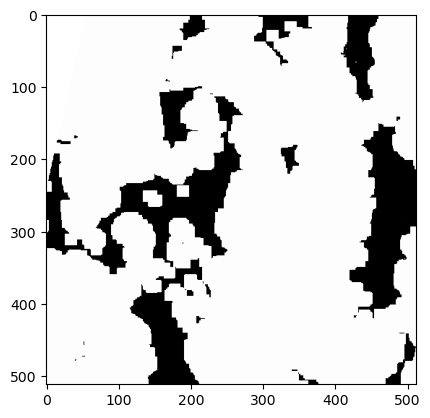

In [77]:
plt.imshow(output_data.squeeze(), cmap="gray")